In [2]:
# data from: http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

import numpy as np
import pandas as pd

In [3]:
'''
    7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's
'''

"\n    7. Attribute Information:\n\n    1. CRIM      per capita crime rate by town\n    2. ZN        proportion of residential land zoned for lots over\n                 25,000 sq.ft.\n    3. INDUS     proportion of non-retail business acres per town\n    4. CHAS      Charles River dummy variable (= 1 if tract bounds\n                 river; 0 otherwise)\n    5. NOX       nitric oxides concentration (parts per 10 million)\n    6. RM        average number of rooms per dwelling\n    7. AGE       proportion of owner-occupied units built prior to 1940\n    8. DIS       weighted distances to five Boston employment centres\n    9. RAD       index of accessibility to radial highways\n    10. TAX      full-value property-tax rate per $10,000\n    11. PTRATIO  pupil-teacher ratio by town\n    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks\n                 by town\n    13. LSTAT    % lower status of the population\n    14. MEDV     Median value of owner-occupied homes in $1

In [4]:
# Creating header
colnames = ['Price','CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD'\
                        'TAX','PTRATIO','B','LSTAT','MEDV']

In [5]:
# Reading csv and concatenating the header
housingData = pd.read_csv('housingData.csv', names=colnames)

In [6]:
# Creating the dataframe
housing = pd.DataFrame(housingData)

In [7]:
# Glimpse on the data frame
housing.head(5)

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RADTAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
# Regression
from sklearn import datasets, linear_model

In [10]:
# Loading csv file into a readable format for sklearn
data =  np.loadtxt(fname = 'housingData.csv', delimiter = ',')

In [49]:
data[:,0]

array([  6.32000000e-03,   2.73100000e-02,   2.72900000e-02,
         3.23700000e-02,   6.90500000e-02,   2.98500000e-02,
         8.82900000e-02,   1.44550000e-01,   2.11240000e-01,
         1.70040000e-01,   2.24890000e-01,   1.17470000e-01,
         9.37800000e-02,   6.29760000e-01,   6.37960000e-01,
         6.27390000e-01,   1.05393000e+00,   7.84200000e-01,
         8.02710000e-01,   7.25800000e-01,   1.25179000e+00,
         8.52040000e-01,   1.23247000e+00,   9.88430000e-01,
         7.50260000e-01,   8.40540000e-01,   6.71910000e-01,
         9.55770000e-01,   7.72990000e-01,   1.00245000e+00,
         1.13081000e+00,   1.35472000e+00,   1.38799000e+00,
         1.15172000e+00,   1.61282000e+00,   6.41700000e-02,
         9.74400000e-02,   8.01400000e-02,   1.75050000e-01,
         2.76300000e-02,   3.35900000e-02,   1.27440000e-01,
         1.41500000e-01,   1.59360000e-01,   1.22690000e-01,
         1.71420000e-01,   1.88360000e-01,   2.29270000e-01,
         2.53870000e-01,

In [65]:
# Dependent variable (TM)

#y = data[:,0]
y = data[:, np.newaxis, -1]

#x = data[:,6]
x = data[:, np.newaxis, :-4]

In [55]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Training the model
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % np.mean((regr.predict(x) - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Coefficients: 
 [[-0.12316272]]
Mean squared error: 72.42
Variance score: 0.14


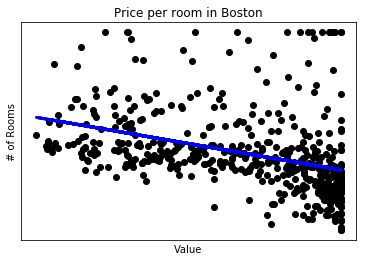

In [59]:
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline 

plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue',
         linewidth=3)

plt.xlabel('Value')
plt.ylabel('# of Rooms')
plt.title('Price per room in Boston')

plt.xticks(())
plt.yticks(())

plt.show()